In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import numpy as np
from sklearn.linear_model import RidgeCV,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
data=df=pd.read_csv("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\Data\\Rendements\\okay\\mil_mais.csv")

In [3]:
col=data.columns
col

Index(['provinces', 'year', 'Tmin_ERA5', 'ERA5_Pressure', 'ERA5_Tmax',
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp', 'NDVI', 'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino', 'AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'sahel_rainfal',
       'tna', 'tsa', 'mais', 'mil'],
      dtype='object')

In [4]:
c0=['provinces']
c1=['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp',  'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino','sahel_rainfal','qbo' ]
c2=['NDVI','ERA5_soil_moisture','AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst',
       'tna', 'tsa']
d2=data[c2]
d3=data[ 'mil']
d4=data['mais']

In [5]:
d1=data[c1]
X = pd.DataFrame(StandardScaler().fit_transform(d1))
d1=X.rename(columns={0:'year', 1:'Tmin_ERA5', 2:'ERA5_Pressure',
        3:'ERA5_wins', 4:'ARC2_year', 5:'Best_Temp_Max',
       6:'Best_Temp', 7:'Tamsat_Prec', 8:'chirps_Prec', 9:'CDD', 10:'CWD',
       11:'PRCPTOT', 12:'R10mm', 13:'R1mm', 14:'R20mm', 15:'R5mm', 16:'R95pTOT', 17:'R99pTOT',
       18:'RX1day', 19:'RX5day', 20:'SDII', 21:'TNn', 22:'TXn', 23:'TNx', 24:'TXx', 25:'Nino',26:'sahel_rainfal',27:'qbo'})

In [6]:
dt=pd.concat([data[c0],d1,d2,d3,d4],axis=1)
dt

,provinces,year,Tmin_ERA5,ERA5_Pressure,ERA5_wins,ARC2_year,Best_Temp_Max,Best_Temp,Tamsat_Prec,chirps_Prec,...,AO,EA,NAO,NTA,PDO,gmsst,tna,tsa,mil,mais
0,Bale,-1.638356,-1.087528,-0.370056,-0.454051,-0.190868,-0.354215,-1.166262,-0.469743,-0.092878,...,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667,960.581652,1459.049128
1,Banwa,-1.638356,-1.207182,-0.380800,-0.414125,0.305342,-0.683454,-1.383374,-0.251991,-0.343494,...,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667,1029.044240,1308.239124
2,Bale,-1.445608,-0.847959,0.735889,-0.260182,-0.274032,-0.520714,-0.981679,0.584017,0.343589,...,0.447667,0.456667,-0.003333,-0.010000,-0.360000,0.663333,0.116667,0.403333,979.593220,1750.949650
3,Kossi,-1.638356,-0.292140,-1.180025,-0.512948,-0.664539,0.003042,-0.601474,-0.644021,-0.941824,...,0.425333,-0.110000,0.540000,-0.206667,-0.046667,0.626667,-0.076667,0.286667,550.000000,535.000000
4,Bale,-1.252861,-0.048313,0.262063,-0.027426,-0.554506,0.033129,-0.072216,0.563520,-0.261517,...,0.574000,0.106667,0.560000,-0.120000,-0.433333,0.773333,-0.113333,0.376667,850.526316,1578.408370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Zondoma,1.445608,0.607924,0.064498,-0.419878,0.571828,0.216633,0.790537,0.029485,0.012239,...,-0.258333,-1.446667,-0.180000,0.296667,2.333333,1.206667,0.363333,0.473333,638.142700,793.429896
806,Yatenga,1.638356,0.958150,-0.454895,0.110027,0.110653,0.938027,1.485328,-1.084946,-0.577379,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,658.394064,813.503311
807,Ziro,1.638356,-0.542672,1.001500,-0.306143,0.552101,-0.638153,-0.300305,0.147152,0.378733,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,706.659920,1237.511702
808,Zoundweogo,1.638356,-0.063794,0.788359,-0.175251,0.851918,-0.609218,-0.215582,-0.003973,-0.001632,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,1019.297740,1768.268712


In [7]:
#var = pd.get_dummies(df[c0],drop_first=True)

In [8]:
#dt0=pd.concat([var,d1,d2],axis=1)
#y=data['mil']

In [9]:
drivers=['year','AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

indices=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx']

meteo= ['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec', 'chirps_Prec', 'NDVI','ERA5_soil_moisture' ]

ind_driver=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx',
            'AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

ind_meteo=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx','Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec', 'chirps_Prec', 'NDVI','ERA5_soil_moisture' ]

meteo_driver=['year', 'Tmin_ERA5', 'ERA5_Pressure','ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec',
              'chirps_Prec', 'NDVI','ERA5_soil_moisture', 
              'AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

All=['year', 'Tmin_ERA5', 'ERA5_Pressure', 
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp', 'NDVI', 'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino', 'AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'sahel_rainfal',
       'tna', 'tsa']

c0=['provinces']

In [34]:
class model:
    
    def __init__(self,df,n,predicteur,var):
        self.df=df
        self.n=n
        self.predicteur=predicteur
        self.var=var
        self.model1=None
        self.model2=None
        self.model3=None
        self.model4=None
        self.X_train=None
        self.X_test=None
        self.y_train=None
        self.y_test =None
        pred=self.df[self.predicteur]
        y=self.df[self.var]
        dum = pd.get_dummies(self.df[c0],drop_first=True)
        X=pd.concat([dum,pred],axis=1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y,test_size=0.2,random_state=self.n) 

        self.model1 = RidgeCV()
        self.model2 = Lasso(normalize=True, tol=1e-3)
        self.model3 = RandomForestRegressor(n_estimators = 500,max_depth=23)
        self.model4 = DecisionTreeRegressor(max_depth=23) 

        self.model1.fit(self.X_train, self.y_train)
        self.model2.fit(self.X_train, self.y_train)
        self.model3.fit(self.X_train, self.y_train)
        self.model4.fit(self.X_train, self.y_train)

    def prediction(self):
            train_RidgeCV=self.model1.score(self.X_train, self.y_train)
            test_RidgeCV=self.model1.score(self.X_test, self.y_test)

            train_LassoCV=self.model2.score(self.X_train, self.y_train)
            test_LassoCV=self.model2.score(self.X_test, self.y_test)

            train_RandomForest=self.model3.score(self.X_train, self.y_train)
            test_RandomForest=self.model3.score(self.X_test, self.y_test)
 
            train_DecisionTree=self.model4.score(self.X_train, self.y_train)
            test_DecisionTree=self.model4.score(self.X_test, self.y_test)


            data = {'model': ['RandomForest', 'DecisionTree', 'RidgeCV', 'Lasso'],
            'Score_train': [train_RandomForest, train_DecisionTree, train_RidgeCV, train_LassoCV],
            'score_test': [test_RandomForest, test_DecisionTree, test_RidgeCV, test_LassoCV]
              }
            d = pd.DataFrame(data)
            return d
    
    def get_RF(self):
        feat_importances = pd.Series(self.model3.feature_importances_, index=self.X_train.columns)
        feat_importances.nlargest(20).plot(kind='barh')
    
    def get_RidgeCV(self):
        feat_importances = pd.Series(self.model1.coef_, index=self.X_train.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        
    def get_Lasso(self):
        return self.model2       

    def get_dec_tree(self):
        return self.model4



#### Prediction of corn with meteo variables

In [22]:
t1=model(dt,1,meteo,'mais')
t1.prediction()

,model,Score_train,score_test
0,RandomForest,0.942795,0.635072
1,DecisionTree,0.999977,0.397023
2,RidgeCV,0.592113,0.589218
3,Lasso,0.568019,0.576498


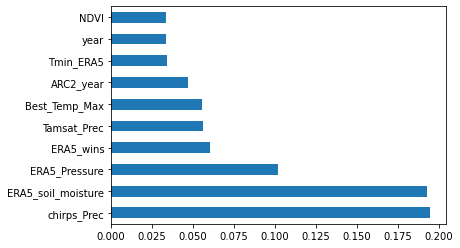

In [23]:
t1.get_RF()
plt.savefig("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\code\\Crop_yield\\python\\dern\\figure\\feature_met_RF_mais.jpg")

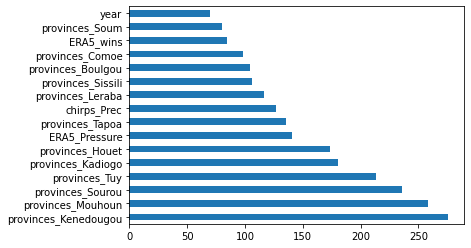

In [24]:
t1.get_RidgeCV()

In [175]:
t2=model(dt,1,meteo,'mil')
t2.prediction()

,model,Score_train,score_test
0,RandomForest,0.748286,0.251929
1,DecisionTree,0.999997,-0.484340
2,RidgeCV,0.270572,0.251495
3,Lasso,0.128327,0.128914


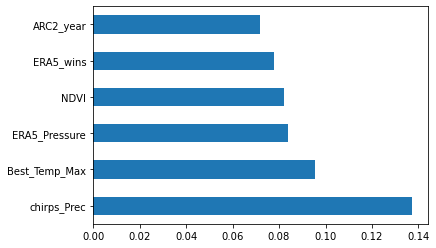

In [176]:
t2.get_RF()

### Prediction of corn with drivers variables

In [35]:
t3=model(dt,1,drivers,'mais')
t3.prediction()

,model,Score_train,score_test
0,RandomForest,0.866173,0.572351
1,DecisionTree,0.841909,0.377283
2,RidgeCV,0.665885,0.655314
3,Lasso,0.519891,0.506657


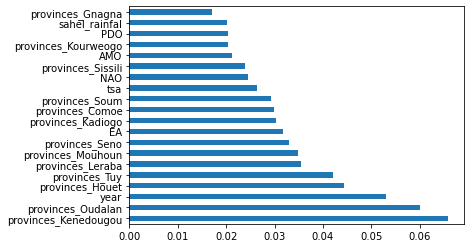

In [37]:
t3.get_RF()
plt.savefig("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\code\\Crop_yield\\python\\dern\\figure\\driver_met_RF_mais.jpg")

In [181]:
t4=model(dt,1,drivers,'mil')
t4.prediction()

,model,Score_train,score_test
0,RandomForest,0.735699,0.283482
1,DecisionTree,0.775869,-0.060571
2,RidgeCV,0.341942,0.368257
3,Lasso,0.113552,0.095658


In [25]:
t5=model(dt,1,indices,'mais')
t5.prediction()

,model,Score_train,score_test
0,RandomForest,0.930781,0.516346
1,DecisionTree,0.999732,0.116464
2,RidgeCV,0.633870,0.584247
3,Lasso,0.541139,0.506080


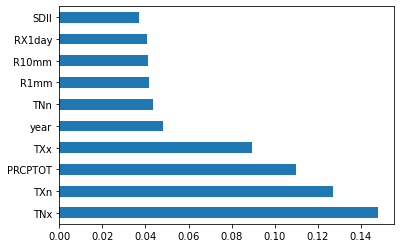

In [28]:
t5.get_RF()
plt.savefig("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\code\\Crop_yield\\python\\dern\\figure\\feature_indices_RF_mais.jpg")

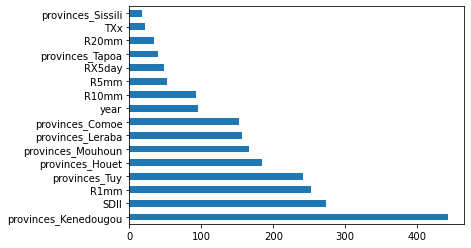

In [27]:
t5.get_RidgeCV()

In [58]:
t6=model(dt,1,indices,'mil')
t6.prediction()

,model,Score_train,score_test
0,RandomForest,0.882847,0.261290
1,DecisionTree,0.999940,-1.600360
2,RidgeCV,0.332005,0.298565
3,Lasso,0.153520,0.149324


In [36]:
t7=model(dt,1,ind_driver,'mais')
t7.prediction()

,model,Score_train,score_test
0,RandomForest,0.933710,0.523262
1,DecisionTree,0.999082,0.109960
2,RidgeCV,0.691060,0.664085
3,Lasso,0.555656,0.541046


In [59]:
t8=model(dt,1,ind_driver,'mil')
t8.prediction()

,model,Score_train,score_test
0,RandomForest,0.888240,0.285449
1,DecisionTree,0.986715,-0.867480
2,RidgeCV,0.353221,0.376602
3,Lasso,0.166671,0.169797


In [42]:
t9=model(dt,1,ind_meteo,'mais')
t9.prediction()

,model,Score_train,score_test
0,RandomForest,0.938715,0.620764
1,DecisionTree,1.000000,0.251581
2,RidgeCV,0.613577,0.582662
3,Lasso,0.570650,0.576778


In [43]:
t10=model(dt,1,ind_meteo,'mil')
t10.prediction()

,model,Score_train,score_test
0,RandomForest,0.880344,0.250024
1,DecisionTree,0.997488,-0.663034
2,RidgeCV,0.311045,0.279186
3,Lasso,0.153570,0.150290


In [44]:
model(dt,1,meteo_driver,'mais')

,model,Score_train,score_test
0,RandomForest,0.943277,0.644828
1,DecisionTree,0.999591,0.354647
2,RidgeCV,0.679918,0.681781
3,Lasso,0.583512,0.601298


In [60]:
t11=model(dt,1,meteo_driver,'mil')
t11.prediction()

,model,Score_train,score_test
0,RandomForest,0.889006,0.306312
1,DecisionTree,0.987797,-0.662491
2,RidgeCV,0.329618,0.350178
3,Lasso,0.147773,0.148010


In [45]:
t12model(dt,1,All,'mais')
t12.prediction()

,model,Score_train,score_test
0,RandomForest,0.941292,0.629956
1,DecisionTree,1.000000,0.421939
2,RidgeCV,0.642465,0.621043
3,Lasso,0.584009,0.597665


In [61]:
t13=model(dt,1,All,'mil')
t13.prediction()

,model,Score_train,score_test
0,RandomForest,0.886926,0.300251
1,DecisionTree,0.996288,-0.698570
2,RidgeCV,0.360550,0.376395
3,Lasso,0.166528,0.170145


In [13]:
a=pd.DataFrame(pd.DataFrame(dt.corr()).iloc[:,40:42]) 
a

,mil,mais
year,-0.005770,0.169005
Tmin_ERA5,-0.271013,-0.515785
ERA5_Pressure,0.292826,0.579856
ERA5_wins,-0.230771,-0.413070
ARC2_year,0.277525,0.519562
Best_Temp_Max,-0.312863,-0.532655
Best_Temp,-0.284774,-0.481035
Tamsat_Prec,0.276793,0.555498
chirps_Prec,0.312999,0.588642
CDD,-0.039683,-0.141282


In [183]:
All_2=['Tmin_ERA5', 'ERA5_Pressure', 
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp',  'Tamsat_Prec', 'chirps_Prec', 
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx']

In [184]:
t14=model(dt,1,All_2,'mais')
t14.prediction()

,model,Score_train,score_test
0,RandomForest,0.937878,0.618799
1,DecisionTree,0.998110,0.135952
2,RidgeCV,0.659003,0.662834
3,Lasso,0.565699,0.580446


In [185]:
t15=model(dt,1,All_2,'mil')
t15.prediction()

,model,Score_train,score_test
0,RandomForest,0.881673,0.265211
1,DecisionTree,0.999937,-1.130244
2,RidgeCV,0.301612,0.277189
3,Lasso,0.153564,0.150337
